In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from random import randint

In [2]:
# we will use these colors in our plots
color_p = [['mediumblue', 'cornflowerblue'], 
          ['deeppink', 'lightpink'],
          ['forestgreen', 'lightgreen'],
          ['gold', 'wheat'],
          ['darkorange','navajowhite'],
          ['firebrick','lightcoral'],
          ['turquoise','paleturquoise']]

# Long-run properties of Markov chains

In the last notebook we explored different kinds of transition matrices and how they influence the sample paths of a Markov chain. Today we want to look at the long-run properties of sample paths of Markov chains with different transition matrices.

## Long-run proportion of time spent in states for simple Markov chains

We begin by looking at the 3 two-state Markov chains that we considered in the last notebook. The question of interest is how long it takes the proportion of visits to a certain state to converge to the stationary distribution.

### A first example

In [3]:
# probability of moving from 0 to 0
p_00 = 0.2
# probability of moving from 1 to 0
p_10 = 0.8
P = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
P = np.round(P,10)

print("P = \n", P)

P = 
 [[0.2 0.8]
 [0.8 0.2]]


To make sure that we always have a stochastic matrix we again define the function that test this for us.

In [4]:
#here we check whether the matrix is a probability matrix
def check_trans(P):
    if np.shape(P)[1] != np.shape(P)[0]:
        print("This is not a proper transition matrix, it is not square.")
        return
    elif True in (P < 0):
        print("This is not a proper transition matrix, at least one entry is negative.")
        return
    elif False in ( np.sum(P, axis = 1) == 1):
        print("This is not a proper transition matrix, at least one row does not sum to 1.")
        return

In [5]:
check_trans(P)

Let us now look at the time spent by a sample path of this Markov chain in each state. For this we define a function *plot_time_spent*, that plots the proportion of time spent in each state and the value of the stationary distribution for each state. It takes as inputs a transition matrix $P$, the starting state $start$, and the number of step we want it to make $nsteps$.

In [7]:
def plot_time_spent(P, start, nsteps):
    
    #first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # Now we compute the stationary distribution, 
    # for this we look for the right eigenvector of P transpose
    # that corresponds to the eigenvalue 1
    evals, evecs = np.linalg.eig(P.T)
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]
    st = evec1 / evec1.sum()
    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    st = st.real
    
    plt.figure(figsize=(17, 6))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('Proportion')
    plt.xlabel('Time')
    plt.axis([0, nsteps, -0.1, 1.1])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    # plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use X to save the path
    X = np.zeros(nsteps+1)
    # starting state
    X[0] = start
    for i in range(0, nsteps) :
        step = uniform.rvs(size = 1, loc = 0, scale = 1)
        next = 0
        while sum(P[int(X[i])][range(0,next+1)]) < step:
                  next = next + 1
        X[i+1] = next
    
    # we will use S to save the proportion of time spent in each state
    S = [None] * np.shape(P)[1]
    for x in range(0,np.shape(P)[1]):
        # define the vector of proportions for each state
        S[x] = np.cumsum(X == x)/np.arange(1,nsteps+2)
        
        ax.plot(S[x], color = color_p[x][0], 
                label = 'proportion of time spent in ' + str(x))
        plt.axhline(y=st[x], color=color_p[x][1], linestyle='-', alpha = 0.5, 
                    label = 'stationary distribution of state ' + str(x))
        plt.legend()
    return

As in the last notebook, you can choose the starting position by changing $start$: you can choose any number between 0 and the size of your matrix -1. In this case here, we can choose 0 or 1. You can also change the number of steps your sample of the Markov chain makes by changing the variable $steps$.

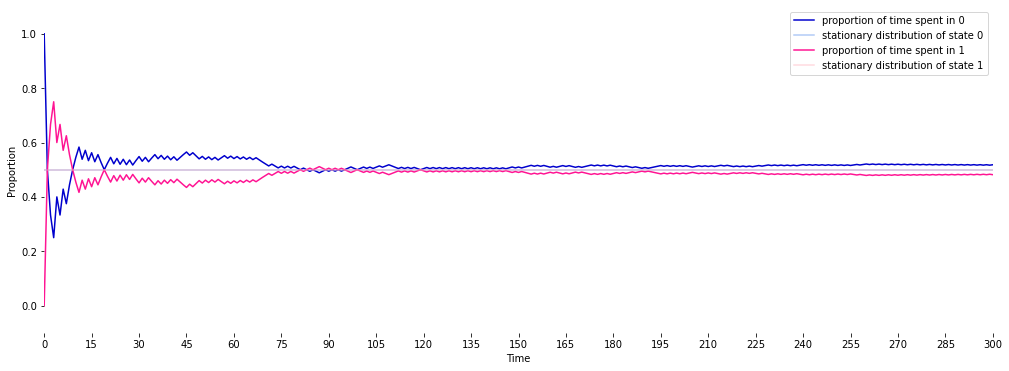

In [8]:
# number of steps
steps = 300
# initial state
start = 0

plot_time_spent(P, start, steps)

### A second example

Let's now change the matrix and see how the convergence changes. Again, this is a transition matrix from the last notebook.

In [9]:
# probability of moving from 0 to 0
p_00 = 0.8
# probability of moving from 1 to 0
p_10 = 0.2
R = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
R = np.round(R,10)

print("R = \n", R)
check_trans(R)

R = 
 [[0.8 0.2]
 [0.2 0.8]]


Don't forget to play around with the parameters if you want!

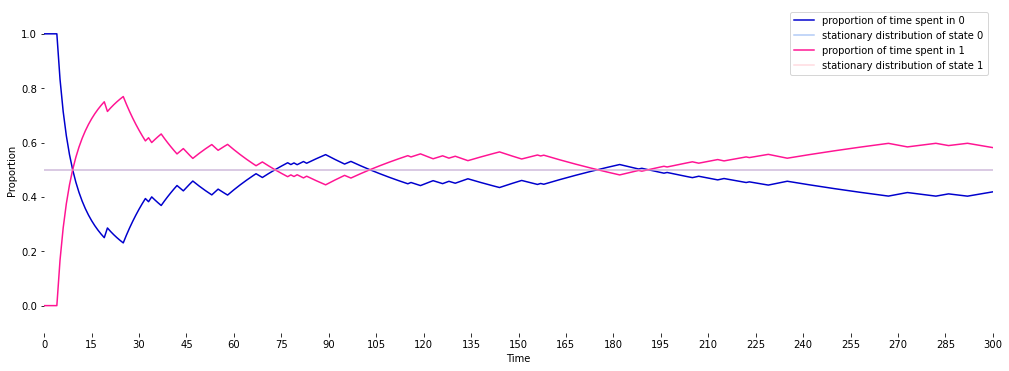

In [11]:
# number of steps
steps = 300
# initial state
start = 0

plot_time_spent(R, start, steps)

### A third example

Let us change the matrix one more time, and use the matrix $S$ from the last notebook.

In [14]:
# probability of moving from 0 to 0
p_00 = 0.8
# probability of moving from 1 to 0
p_10 = 0.8
S = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
S = np.round(S,10)

print("S = \n", S)
check_trans(S)

S = 
 [[0.8 0.2]
 [0.8 0.2]]


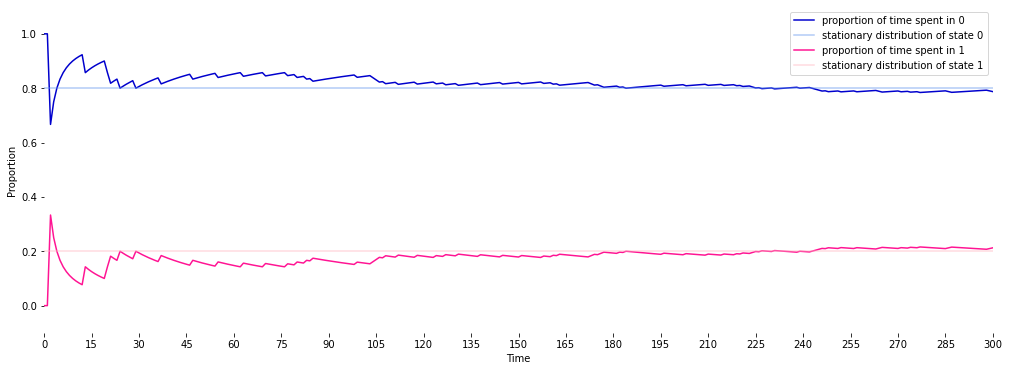

In [15]:
# number of steps
steps = 300
# initial state
start = 0

plot_time_spent(S, start, steps)

**Question 1:** Compare the three Markoc chains we looked at by running the cells a few times. Is the convergence faster in some cases? Does it happen that the time spent in each state approaches the stationary distribution but deviates again? Does the convergence change according to the starting state? Does the speed of convergence change a lot each time you rerun the cell? Try to think of an explanation for differences in behaviour. 

## Long-run transition probabilities

The second topic we want to investigate are long-run transition probabilities. The statement of the main Markov chain theorem says that transition probabilities converge to the stationary distribution if the Markov chain is finite, irreducible and aperiodic. Note that unlike the convergence of the time spent in a certain state, this statement does not refer to sample paths, but simply to probabilities, so we do not need to generate sample paths to visualize this result, it is enough to take powers of the transition matrix.

We will now use a Markov chain with three states. Feel free to change the transition probabilities.

In [16]:
# probability of moving from 0 to 0
p_00 = 0.9
# probability of moving from 0 to 1
p_01 = 0.1
# probability of moving from 1 to 0
p_10 = 0.5
# probability of moving from 1 to 1
p_11 = 0.4
# probability of moving from 2 to 0
p_20 = 0.1
# probability of moving from 2 to 1
p_21 = 0

T = np.array( [ [ p_00, p_01, 1 - p_00 - p_01 ], [ p_10, p_11, 1 - p_10 - p_11 ], [ p_20, p_21, 1 - p_20 - p_21 ] ] )

# we round the matrix to avoid floating point errors
T = np.round(T,10)

print("T = \n", T)

check_trans(T)

T = 
 [[ 0.9  0.1 -0. ]
 [ 0.5  0.4  0.1]
 [ 0.1  0.   0.9]]


The function below computes the transition probabilities for all times between 0 and *nsteps*, for a starting state *start* and the state we are interested in being in, called *end*. As you probably expect, it takes as inputs, a transition matrix *P*, two states *start* and *end* and an integer *nsteps*.

In [21]:
def plot_trans_prob(P, start, end, nsteps):
    
    #first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # Now we compute the stationary distribution, 
    # for this we look for the right eigenvector of P transpose
    # that corresponds to the eigenvalue 1
    evals, evecs = np.linalg.eig(P.T)
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]
    st = evec1 / evec1.sum()
    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    st = st.real
    
    # we then compute the transition probabilities
    t = np.zeros(nsteps+1)
    t[0] = (start == end)*1
    t[1] = P[start,end]
    Q = P
    for n in range(2,nsteps+1):
        Q = np.matmul(P,Q)
        t[n] = Q[start,end]
    
    plt.figure(figsize=(17, 4))  
    
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('Probability')
    plt.xlabel('Time')
    plt.axis([0, nsteps, -0.1, 1.1])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    # plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    

    ax.plot(t, color = color_p[end][0], 
            label = 'several step transition probability from ' + str(start) +' to ' + str(end))
    plt.axhline(y=st[end], color = color_p[end][1], linestyle='-', alpha = 0.5, 
                label = 'stationary distribution of state ' + str(end))
    plt.legend()
    return

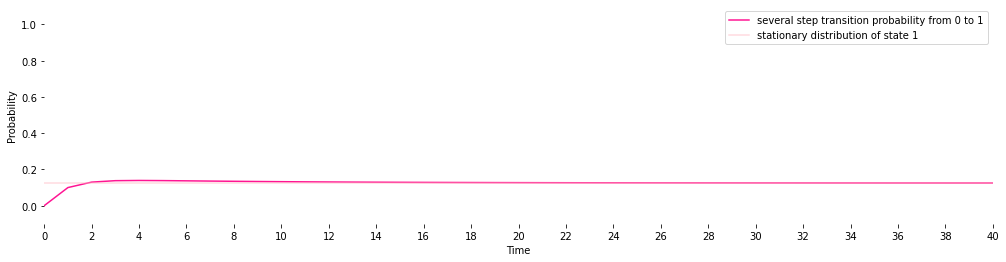

In [22]:
# initial state
start = 0
# final state
end = 1
# number of steps for each path
steps = 40

plot_trans_prob(T, start, end, steps)

While that statement of the theorem is not about sample paths, it can be made into one about sample paths by a standard theorem from probability theory. 

The function **plot_trans_prob_samples** below generates as many sample paths as the parameter *reps* and plots the number of times the chain lands in state $end$ when the chain starts in $start$ for all times up to *nsteps*. It takes as inputs the same parameters as before and in addition an integer *reps* that determines how many samples are drawn.

In [24]:
def plot_trans_prob_samples(P, start, end, nsteps, reps):
    
    #first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # Now we compute the stationary distribution, 
    # for this we look for the right eigenvector of P transpose
    # that corresponds to the eigenvalue 1
    evals, evecs = np.linalg.eig(P.T)
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]
    st = evec1 / evec1.sum()
    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    st = st.real
    
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('Proportion')
    plt.xlabel('Time')
    plt.axis([0, nsteps, -0.1, 1.1])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    # plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use Y to record how often we landed in state end_state for each time
    Y = np.zeros(nsteps+1)
    for r in range(0,reps):
        # we will use X to save the states
        X = np.zeros(nsteps+1)
        # starting state
        X[0] = start
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next

        Y = Y + (X == end)*1

    Y = Y/reps

    ax.plot(Y, color = color_p[end][0], 
            label = 'proportion of chains that were in ' + str(end) + ' at given time')
    plt.axhline(y=st[end], color = color_p[end][1], linestyle='-', alpha = 0.5, 
                label = 'stationary distribution of state ' + str(end))
    plt.legend()
    return

Let us apply this function on our matrix $T$ and compare the plot to the plot above. Again, feel free to play with the parameters, especially with *reps*.

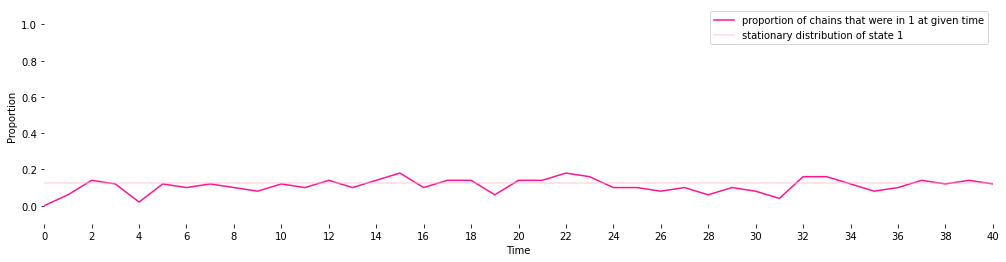

In [25]:
# initial state
start = 0
end = 1
# number of steps for each path
steps = 40
# number of sample paths
reps = 50

plot_trans_prob_samples(T, start, end, steps, reps)

**Question 2:** Do the two paths look similar? If they don't try to increase the number of samples (the parameter *reps*) until they do. Explain why the law of large numbers implies that for any time $n$ the value of the curve above should approach $p^n(start,end)$.

### Long-run transition probabilities of periodic Markov chains

Let us now quickly look at the long-run behaviour of periodic Markov chains. We use our periodic Markov chain from the previous notebook.

In [27]:
## probability of moving from 0 to 0
p_00 = 0
# probability of moving from 0 to 1
p_01 = 0.5
# probability of moving from 0 to 2
p_02 = 0
# probability of moving from 1 to 0
p_10 = 0.2
# probability of moving from 1 to 1
p_11 = 0
# probability of moving from 1 to 2
p_12 = 0.8
# probability of moving from 2 to 0
p_20 = 0
# probability of moving from 2 to 1
p_21 = 0.1
# probability of moving from 2 to 2
p_22 = 0
# probability of moving from 2 to 0
p_30 = 0.6
# probability of moving from 2 to 1
p_31 = 0
# probability of moving from 2 to 2
p_32 = 0.4

# now we define the matrix using the values above
U = np.array( [ [ p_00 , p_01, p_02, 1 - p_00 - p_01 - p_02 ], 
               [ p_10, p_11, p_12, 1 - p_10 - p_11 - p_12 ], 
               [ p_20, p_21, p_22, 1 - p_20 - p_21 - p_22 ],
               [ p_30, p_31, p_32, 1 - p_30 - p_31 - p_32 ]] )

# we round the matrix to avoid floating point errors
U = np.round(U,10)

print("U = \n", U)

check_trans(U)

U = 
 [[0.  0.5 0.  0.5]
 [0.2 0.  0.8 0. ]
 [0.  0.1 0.  0.9]
 [0.6 0.  0.4 0. ]]


In the graph below you can see that the long-run transition probabilities do not converge to the stationary distribution, but oscillate.

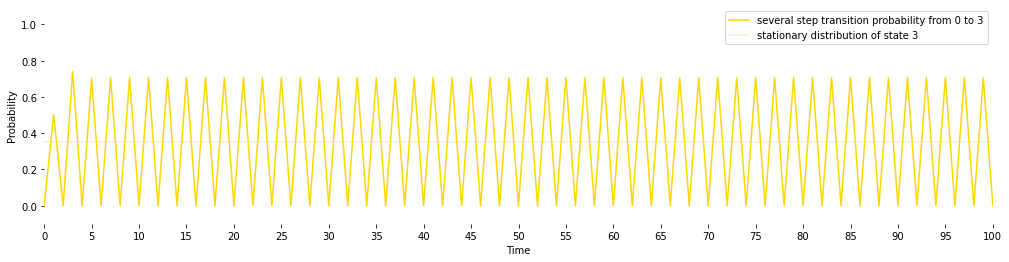

In [29]:
# initial state
start = 0
# final state
end = 3
# number of steps for each path
steps = 100

plot_trans_prob(U, start, end, steps)

Note that other statements still hold for periodic chains. In particular the proportion of times spent in a state converges to the stationary distribution if the chain is irreducible and recurrent. You can see this for the chain with transition matrix $W$ in the graph below. Run the cell a few times and vary the number of steps to see how long it typically takes the proportion of time spent in a state to converge.

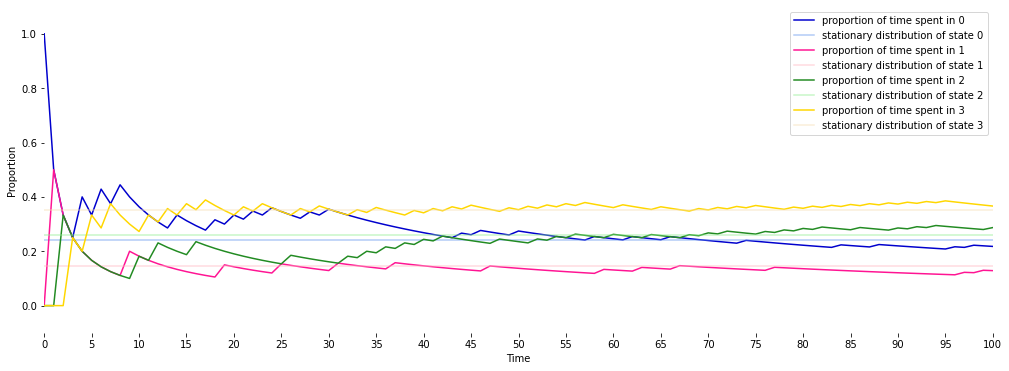

In [30]:
# number of steps
steps = 100
# initial state
start = 0

plot_time_spent(U, start, steps)

## Convergence of long-run transition probabilities vs. convergence of time spent in a certain state

As a last topic we want to look at an example where the convergence of the proportion of time spent in a state to the stationary distribution is not as obvious. For this we look at a specific random walk on a path of length $2n+1$, this is an example for $n = 5$:
<img src="wells.jpg" width="450">

The reason we drew the path in this way is that we view the left and right pieces as "wells" so the chain will have a different probability of going "upwards" and "downwards". More specifically, for all but the middle state and the two bottom states, we define the probability of going downwards to be $q$ for some $1>q>0$.  Additionally, to make sure that the chain is aperiodic, we set for all $ 1 \leq i \leq 2n-1$, $P(i,i) = p$ for some parameter $1>p>0$ and $P(0,0) = P(2n,2n) = p+q$, since from these states we cannot go downwards. Now the probability of going upwards is $1-p-q$ for all states, except for $n$, since we cannot move upwards from there. Finally we set the probability of going to the left or the right from $n$ to be $\frac{1-p}{2}$.

In [31]:
# This function returns the transition matrix 
# for a chain on two wells with $2n+1$ vertices,
# where the probability of staying at the same vertex is p,
# the probability of moving downwards is q.

def well_walk(n, p, q):
    if p+q >= 1:
        print('Error: p + q must be smaller than 1.')
        return
    elif p<=0:
        print('p must be between 0 and 1.')
    elif q<=0:
        print('q must be between 0 and 1.')
    U = np.zeros((2*n+1,2*n+1))
    for i in range(1,2*n):
        U[i,i] = p
        
    U[0,0] = p + q
    U[2*n,2*n] = p + q
    
    U[n,n-1] = (1-p)/2
    U[n,n+1] = (1-p)/2
    
    for i in range(1, n):
        U[i,i-1] = q
        
    for i in range(0, n):
        U[i,i+1] = 1-q-p
    
    for i in range(n+1, 2*n):
        U[i,i+1] = q
    
    for i in range(n+1, 2*n+1):
        U[i,i-1] = 1-p-q

    
    return(U)

In [33]:
# depth of the well
n = 5  
# probability of staying at the same vertex
p = 1/8 
# probability of moving downwards
q = 3/4 

W = well_walk(n,p,q)
W = np.round(W,10)
check_trans(W)
print('W = \n', W)

W = 
 [[0.875  0.125  0.     0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.75   0.125  0.125  0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.75   0.125  0.125  0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.75   0.125  0.125  0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.75   0.125  0.125  0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.4375 0.125  0.4375 0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.125  0.125  0.75   0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.125  0.125  0.75   0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.125  0.125  0.75
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.125  0.125
  0.75  ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.125
  0.875 ]]


Let us first look at the convergence of the transition probabilities, for a starting state *start* and an ending state *end*. 

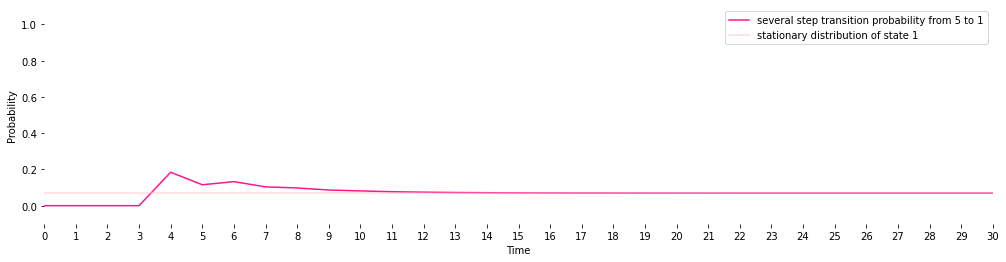

In [34]:
# initial state
start = n 

# state we are interested in reaching
end = 1 

# number of steps for each path
steps = 30

plot_trans_prob(W, start, end, steps)

We see that the transition probability converges pretty fast to the stationary distribution. Let us now look at the proportion of time spent in one state by a single sample path, and look at the convergence to the stationary distribution. Since plotting the time spent in every single states would be too much on one graph, we only plot the time spent in one specific state *end* here.

In [36]:
def plot_time_spent_single(P, start, end, nsteps):
    
    #first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # Now we compute the stationary distribution, 
    # for this we look for the right eigenvector of P transpose
    # that corresponds to the eigenvalue 1
    evals, evecs = np.linalg.eig(P.T)
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]
    st = evec1 / evec1.sum()
    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    st = st.real
    
    plt.figure(figsize=(17, 6))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('Proportion')
    plt.xlabel('Time')
    plt.axis([0, nsteps, -0.1, 1.1])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    # plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use X to save the states
    X = np.zeros(nsteps+1)
    # starting state
    X[0] = start
    for i in range(0, nsteps) :
        step = uniform.rvs(size = 1, loc = 0, scale = 1)
        next = 0
        while sum(P[int(X[i])][range(0,next+1)]) < step:
                  next = next + 1
        X[i+1] = next
    
    # S saves the proportion of time spent in the state end
    S = np.cumsum(X == end)/np.arange(1,nsteps+2)

    ax.plot(S, color = color_p[3][0], 
            label = 'proportion of time spent in ' + str(end))
    plt.axhline(y=st[end], color=color_p[3][1], linestyle='-', alpha = 0.5, 
                label = 'stationary distribution of state ' + str(end))
    plt.legend()
    return

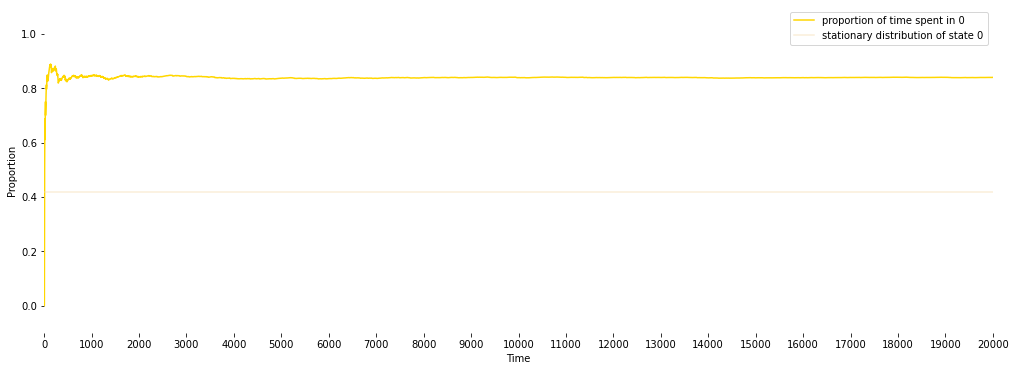

In [39]:
# number of steps
steps = 20000
# initial state
start = n
#final state
end = 0

plot_time_spent_single(W, start, end, steps)

Run the cell a few times with different final states and numbers of steps. You will see that the plot of the proportion of time spent in the final state will vary a lot for the samples, and often does not seem to converge, at least unless the number of steps is not huge. (Again feel free to play with the parameters, but don't increase the parameter *nsteps* too much as it will take forever to run in that case.) Why do you think that is the case? Let us look at a few sample paths for this Markov chain. For this we again define the function *plot_path* from the last notebook, that takes as inputs a transition matrix *P*, a starting state *start* and the number of steps the sample path makes, *nsteps*.

In [41]:
def plot_path(P, start, nsteps):
    
    #f irst we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    plt.figure(figsize=(17, 5))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-1, nsteps+1, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use this to save the states
    X = np.zeros(nsteps+1)
    # starting state
    X[0] = start
    for i in range(0, nsteps) :
        step = uniform.rvs(size = 1, loc = 0, scale = 1)
        next = 0
        while sum(P[int(X[i])][range(0,next+1)]) < step:
                  next = next + 1
        X[i+1] = next
        
    # Choose style of the lines
    ax.plot(X, linestyle= 'solid', marker='.')
    return

Rerun the cell below a few times to see a few different samples paths. If the number of steps is high this might take a few seconds. Again, feel free to change the starting state and the  number of steps (I would not go too high on this parameter. 1 million already takes a couple of minutes on my computer. If the cell takes too long to run you can interrupt the kernel in the menu above, so that you can rerun it with a smaller parameter.) To interpret the plot, remember that $n$ is the top of the two wells and that the states $0$ to $n-1$ and $n+1$ to $2n$ form the two wells with $0$ and $2n$ being the bottoms of the wells.

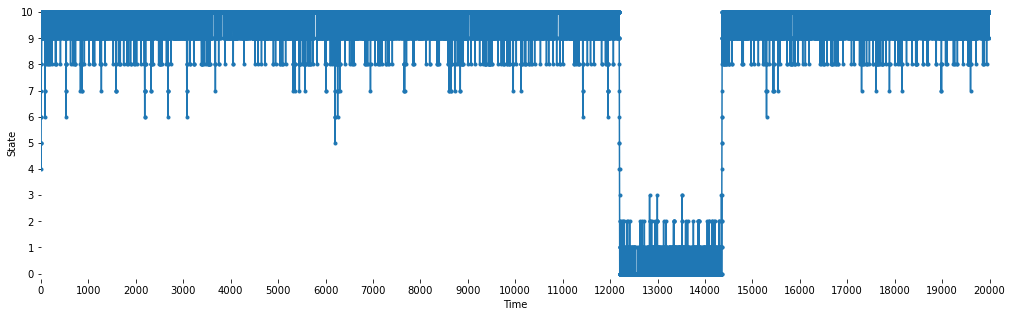

In [46]:
# number of steps
steps = 20000
# initial state
start = n

plot_path(W, start, steps)

Alternatively you can use the function below from last time that plots several sample paths at once. The function *plot_mult_paths* defined below does this and takes the same inputs as above, and in addition a parameter *reps* that sets how many sample paths are plotted.

In [44]:
# P is the transition matrix
# start is the starting state
# nsteps is the number of steps each sample takes
# reps is the number of paths that will be plotted

def plot_mult_paths(P, start, nsteps, reps):
    
    # first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # create the figure we will add the plots to
    plt.figure(figsize=(17, min(reps+5,15)))
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-0.5, nsteps, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));
    
#     ax = plt.subplot(1,1,1) 
#     ax.set_xlabel('Time')
#     ax.set_ylabel('State')
    
    #subplot spacing
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for r in range(0,reps):
        # we will use this to save the states
        X = np.zeros(nsteps + 1)
        # starting state
        X[0] = start
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next
        
        # Remove the plot frame lines.
        ax = plt.subplot(reps,1,r+1)  
        ax.spines["top"].set_visible(True)    
        ax.spines["bottom"].set_visible(True)    
        ax.spines["right"].set_visible(True)    
        ax.spines["left"].set_visible(True) 
        
        ax.axis([-0.5, nsteps, -0.2, np.shape(P)[1]-0.8])
        # Choose style of the lines
        ax.plot(X, linestyle= 'solid', marker = '.', color = ('#%06X' % randint(0, 0xFFFFFF)))
        
         
        if r == reps-1:
            ax.set_xlabel('Time')
         
        if r == np.floor(reps/2):
            ax.set_ylabel('State')
        
        
    return

Again, feel free to rerun the cell below a few times with different parameters to see how the sample paths can look different.

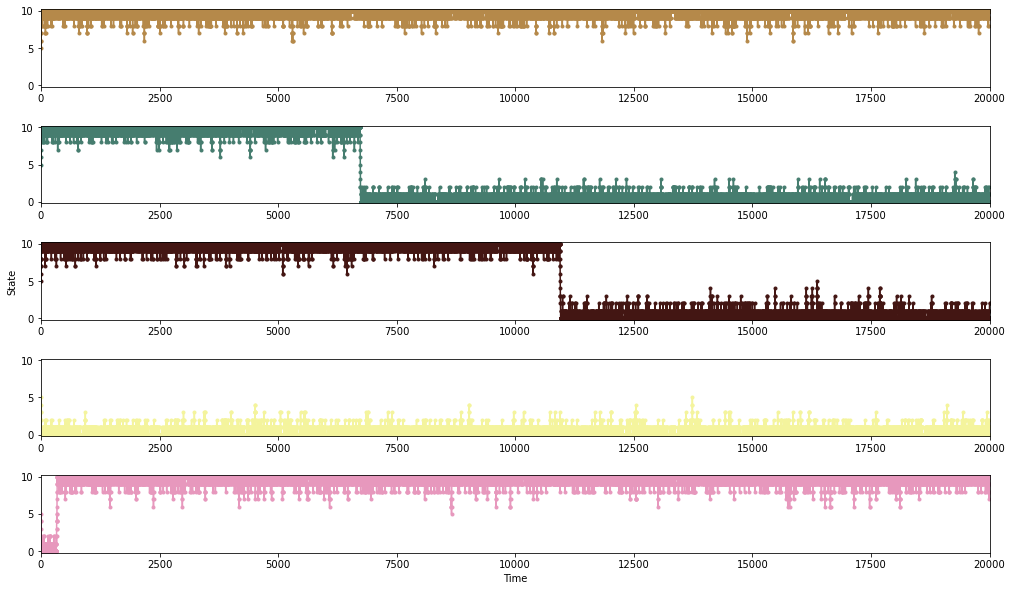

In [47]:
# initial state
start = n
# number of steps for each path
steps = 20000
# number of sample paths
reps = 5

plot_mult_paths(W, start, steps, reps)

**Question 3:** Why does the proportion of time spent in certain states converge to the stationary distribution very slowly for this Markov chain? What consequences does this have for applications of the Metropolis-Hastings algorithm?

## Assignment

Congrats on finishing the third notebook! I hope that it was interesting and I'd be happy about any __[feedback](https://docs.google.com/forms/d/e/1FAIpQLSe42BjDteeuBn_V4ABxSeQGid6ZzoEuydFmI7OvO2R1ap9T3g/viewform?usp=sf_link)__! Your assignment is to answer one of questions 1, 2 or 3 asked in the notebook in the bcourses discussion site corresponding to notebook 3.